In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time


# Creating Dataset for Modeling

In [2]:
usa = pd.read_csv("data/US_2020-05-06.csv") 
display(usa.info())
usa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
country          72 non-null object
date             72 non-null object
confirmed        72 non-null int64
deaths           72 non-null int64
new_confirmed    72 non-null int64
new_deaths       72 non-null int64
tagged_day       72 non-null int64
dtypes: int64(5), object(2)
memory usage: 4.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5


In [3]:
kor = pd.read_csv("data/SouthKorea_2020-05-06.csv") 
display(kor.info())
kor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
country          90 non-null object
date             90 non-null object
confirmed        90 non-null int64
deaths           90 non-null int64
new_confirmed    90 non-null int64
new_deaths       90 non-null int64
tagged_day       90 non-null int64
dtypes: int64(5), object(2)
memory usage: 5.0+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,"Korea, South",2/6/20,23,0,4,0,1
1,"Korea, South",2/7/20,24,0,1,0,2
2,"Korea, South",2/8/20,24,0,0,0,3
3,"Korea, South",2/9/20,25,0,1,0,4
4,"Korea, South",2/10/20,27,0,2,0,5


In [4]:
# joining on vertical stacks (axi s0 for addition to rows) for df's of kor & usa
df = pd.concat([usa, kor], axis=0)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null object
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",5/1/20,10780,250,6,2,86
86,"Korea, South",5/2/20,10793,250,13,0,87
87,"Korea, South",5/3/20,10801,252,8,2,88
88,"Korea, South",5/4/20,10804,254,3,2,89


In [5]:
# change date to type datetime
df['date'] = pd.to_datetime(df.date)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null datetime64[ns]
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2020-02-24,51,0,36,0,1
1,US,2020-02-25,51,0,0,0,2
2,US,2020-02-26,57,0,6,0,3
3,US,2020-02-27,58,0,1,0,4
4,US,2020-02-28,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86
86,"Korea, South",2020-05-02,10793,250,13,0,87
87,"Korea, South",2020-05-03,10801,252,8,2,88
88,"Korea, South",2020-05-04,10804,254,3,2,89


In [6]:
#adding country code column 
def country_code(row):
    if row['country'] == 'US':
        return 'USA'
    if row['country'] == 'Korea, South':
        return 'KOR'

In [8]:
df.apply(lambda row: country_code(row), axis=1)

0     USA
1     USA
2     USA
3     USA
4     USA
     ... 
85    KOR
86    KOR
87    KOR
88    KOR
89    KOR
Length: 162, dtype: object

In [10]:
df['country code'] = df.apply(lambda row: country_code(row), axis=1)

# Reading Our world data


In [11]:
testing = pd.read_csv("data/covid-19-tests-deaths-scatter-with-comparisons_2020May07.csv")
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null object
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: float64(2), object(3)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,24-Mar-20,NaN,0.026
1,Afghanistan,AFG,25-Mar-20,NaN,0.026
2,Afghanistan,AFG,26-Mar-20,NaN,0.026
3,Afghanistan,AFG,27-Mar-20,NaN,0.026
4,Afghanistan,AFG,28-Mar-20,NaN,0.051


In [12]:
# change date to type datetime
testing['Date'] = pd.to_datetime(testing.Date)
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null datetime64[ns]
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,2020-03-24,NaN,0.026
1,Afghanistan,AFG,2020-03-25,NaN,0.026
2,Afghanistan,AFG,2020-03-26,NaN,0.026
3,Afghanistan,AFG,2020-03-27,NaN,0.026
4,Afghanistan,AFG,2020-03-28,NaN,0.051


# Joining 3 df's into 1

In [13]:
df2 = pd.merge(left=df, right=testing, how='left', left_on=['date','country code'], right_on=['Date', 'Code'])
display(df2.info())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 13 columns):
country                                                                           162 non-null object
date                                                                              162 non-null datetime64[ns]
confirmed                                                                         162 non-null int64
deaths                                                                            162 non-null int64
new_confirmed                                                                     162 non-null int64
new_deaths                                                                        162 non-null int64
tagged_day                                                                        162 non-null int64
country code                                                                      162 non-null object
Entity                                                                      

None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,US,2020-02-24,51,0,36,0,1,USA,NaN,NaN,NaT,NaN,NaN
1,US,2020-02-25,51,0,0,0,2,USA,NaN,NaN,NaT,NaN,NaN
2,US,2020-02-26,57,0,6,0,3,USA,NaN,NaN,NaT,NaN,NaN
3,US,2020-02-27,58,0,1,0,4,USA,NaN,NaN,NaT,NaN,NaN
4,US,2020-02-28,60,0,2,0,5,USA,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,"Korea, South",2020-05-01,10780,250,6,2,86,KOR,South Korea,KOR,2020-05-01,12153.0,4.837
158,"Korea, South",2020-05-02,10793,250,13,0,87,KOR,South Korea,KOR,2020-05-02,12241.0,4.876
159,"Korea, South",2020-05-03,10801,252,8,2,88,KOR,South Korea,KOR,2020-05-03,12307.0,4.876
160,"Korea, South",2020-05-04,10804,254,3,2,89,KOR,South Korea,KOR,2020-05-04,12365.0,4.915


In [14]:
df3 = df2.copy(deep=True)

# needed cols: 'country code','date','tagged_day','Total tests per million people','confirmed','deaths','new_confirmed','new_deaths', 
#                    'Total confirmed deaths due to COVID-19 per million people (deaths per million)'

df3_dropped_cols = ['country', 'Entity', 'Code', 'Date']
df3 = df3.drop(labels=df3_dropped_cols, axis=1)
df3

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,2020-02-24,51,0,36,0,1,USA,NaN,NaN
1,2020-02-25,51,0,0,0,2,USA,NaN,NaN
2,2020-02-26,57,0,6,0,3,USA,NaN,NaN
3,2020-02-27,58,0,1,0,4,USA,NaN,NaN
4,2020-02-28,60,0,2,0,5,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157,2020-05-01,10780,250,6,2,86,KOR,12153.0,4.837
158,2020-05-02,10793,250,13,0,87,KOR,12241.0,4.876
159,2020-05-03,10801,252,8,2,88,KOR,12307.0,4.876
160,2020-05-04,10804,254,3,2,89,KOR,12365.0,4.915


In [15]:
df4 = df3.copy(deep=True)
display(df4.shape)
display(df4.info())

(162, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 9 columns):
date                                                                              162 non-null datetime64[ns]
confirmed                                                                         162 non-null int64
deaths                                                                            162 non-null int64
new_confirmed                                                                     162 non-null int64
new_deaths                                                                        162 non-null int64
tagged_day                                                                        162 non-null int64
country code                                                                      162 non-null object
Total tests per million people                                                    150 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per millio

None

In [ ]:
#Removing NaN's
df4['Total tests per million people'] = df4['Total tests per million people'].replace(to_replace =np.NaN, value=0)
df4['Total confirmed deaths due to COVID-19 per million people (deaths per million)'] = df4['Total confirmed deaths due to COVID-19 per million people (deaths per million)'].replace(to_replace =np.NaN, value=0)
display(df4.shape)
display(df4.info())
df4.head()

# Creating two subsets for each country USA & South Korea

In [50]:
dfkor = df4.loc[df4['country code'] == 'KOR']
dfusa = df4.loc[df4['country code'] == 'USA']

# South Korea Visualizations

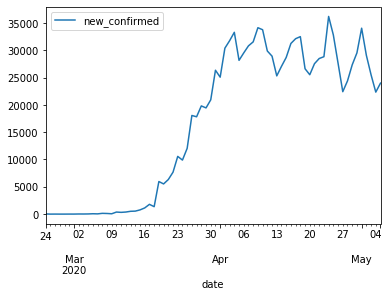

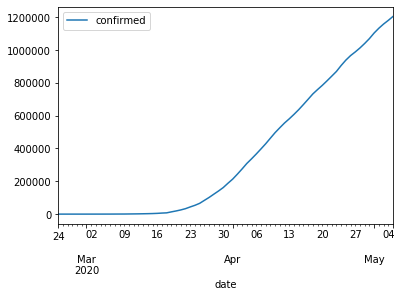

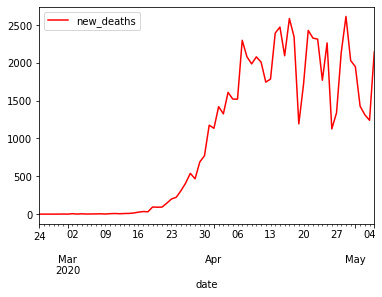

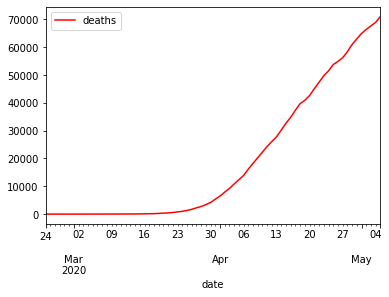

In [18]:
dfkor.plot(x='date', y='new_confirmed' ) 
dfkor.plot(x='date', y='confirmed' ) 
dfkor.plot(x='date', y='new_deaths', color = 'red')
dfkor.plot(x='date', y='deaths', color = 'red')



# USA Visualizations

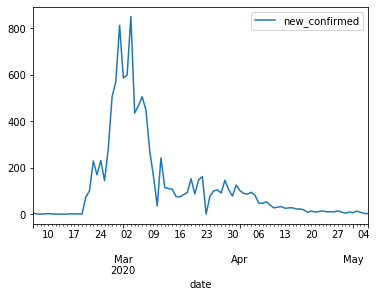

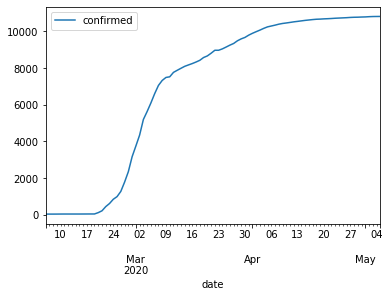

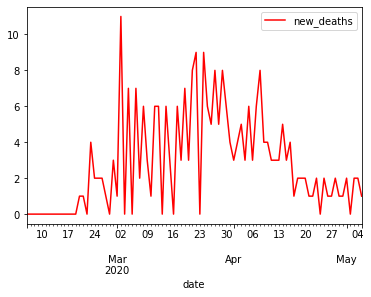

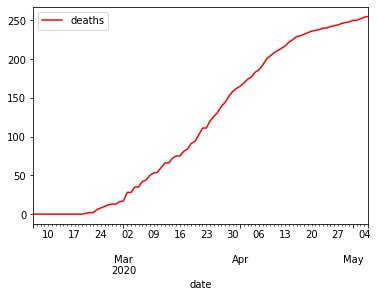

In [19]:
dfusa.plot(x='date', y='new_confirmed' ) 
dfusa.plot(x='date', y='confirmed' ) 
dfusa.plot(x='date', y='new_deaths', color = 'red')
dfusa.plot(x='date', y='deaths', color = 'red')

# USA & South Korea Visualizations

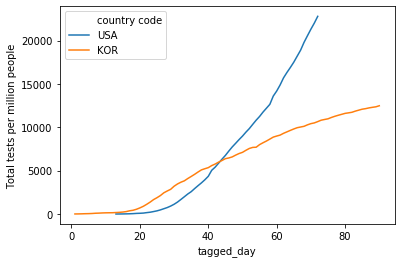

In [20]:
sns.lineplot(x='tagged_day', y='Total tests per million people', data = df3, hue='country code')


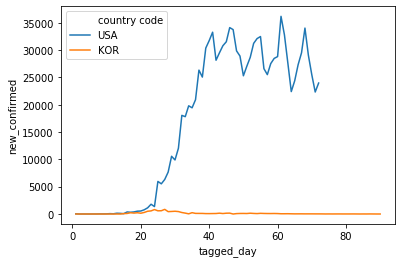

In [23]:
sns.lineplot(x='tagged_day', y='new_confirmed', data = df3, hue='country code')

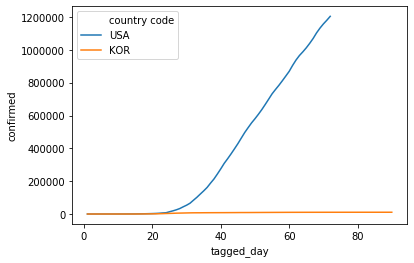

In [24]:
sns.lineplot(x='tagged_day', y='confirmed', data = df3, hue='country code')

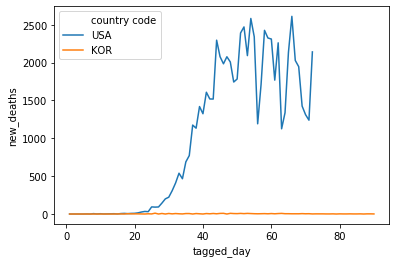

In [32]:
sns.lineplot(x='tagged_day', y='new_deaths', data = df3, hue='country code')

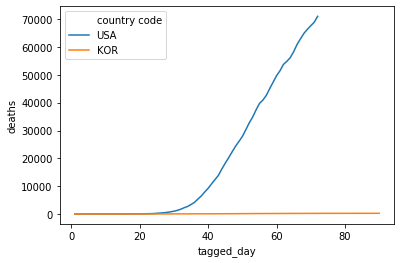

In [27]:
sns.lineplot(x='tagged_day', y='deaths', data = df3, hue='country code')

# Split Test & Train South Korea

In [29]:
# dropping new_deaths and using deaths(cumulative) as repsonse variable
# dropping new_confirmed, since using cumulative values for confirmed cases & deaths
# dropping total confirmed deaths pe rmillion, directly correlated with deaths
# country code, since df contains all values of same country
# removing date, since tagged_day is added 
# using deaths as response variable Y
X_col_dropped = ['date','deaths','new_confirmed', 'new_deaths', 'country code',
                'Total confirmed deaths due to COVID-19 per million people (deaths per million)']
X_kor = dfkor.drop(labels=X_col_dropped, axis=1)

X_col_names = X_kor.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [30]:
y_kor = dfkor.loc[:,'deaths']
y_kor.head()

0    0
1    0
2    0
3    0
4    0
Name: deaths, dtype: int64

In [31]:
X_train_kor, X_test_kor, y_train_kor, y_test_kor = train_test_split(X_kor, y_kor, test_size=0.3, random_state=1)
print(len(X_train_kor),len(y_train_kor))
print(len(X_test_kor),len(y_test_kor))

50 50
22 22


# SVR For Korea with minmax scaling

In [ ]:
# min_max_scaler = MinMaxScaler()
X_train_kor_minmax = min_max_scaler.fit_transform(X_train_kor)# fit training set
X_test_kor_minmax = min_max_scaler.transform(X_test_kor)# test set transform only, no fit
X_test_kor_minmax

In [49]:
# USING GRIDSEARCH
start_time = time.time()
param_grid = {'C': [10,400,500,600,750], 'gamma': [30,20,10,2,1.75,1],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train_kor_minmax,y_train_kor)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

#Results:
#SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=20,
#    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#time taken for grid search =  6.192033052444458

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=2, kernel=linear ....................................
[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=2, kernel=linear ....................................
[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] .

[CV] ..................... C=400, gamma=20, kernel=poly, total=   0.1s
[CV] C=400, gamma=20, kernel=poly ....................................
[CV] ..................... C=400, gamma=20, kernel=poly, total=   0.1s
[CV] C=400, gamma=20, kernel=poly ....................................
[CV] ..................... C=400, gamma=20, kernel=poly, total=   0.0s
[CV] C=400, gamma=20, kernel=sigmoid .................................
[CV] .................. C=400, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=20, kernel=sigmoid .................................
[CV] .................. C=400, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=20, kernel=sigmoid .................................
[CV] .................. C=400, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=20, kernel=sigmoid .................................
[CV] .................. C=400, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=20, kernel=sigmoid .................................
[CV] .

[CV] ..................... C=500, gamma=30, kernel=poly, total=   0.2s
[CV] C=500, gamma=30, kernel=poly ....................................
[CV] ..................... C=500, gamma=30, kernel=poly, total=   0.3s
[CV] C=500, gamma=30, kernel=poly ....................................
[CV] ..................... C=500, gamma=30, kernel=poly, total=   0.3s
[CV] C=500, gamma=30, kernel=poly ....................................
[CV] ..................... C=500, gamma=30, kernel=poly, total=   0.2s
[CV] C=500, gamma=30, kernel=poly ....................................
[CV] ..................... C=500, gamma=30, kernel=poly, total=   0.1s
[CV] C=500, gamma=30, kernel=sigmoid .................................
[CV] .................. C=500, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=30, kernel=sigmoid .................................
[CV] .................. C=500, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=30, kernel=sigmoid .................................
[CV] .

[CV] ................... C=500, gamma=2, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=2, kernel=linear ...................................
[CV] .................... C=500, gamma=2, kernel=linear, total=   0.0s
[CV] C=500, gamma=2, kernel=linear ...................................
[CV] .................... C=500, gamma=2, kernel=linear, total=   0.0s
[CV] C=500, gamma=2, kernel=linear ...................................
[CV] .................... C=500, gamma=2, kernel=linear, total=   0.0s
[CV] C=500, gamma=2, kernel=linear ...................................
[CV] .................... C=500, gamma=2, kernel=linear, total=   0.0s
[CV] C=500, gamma=2, kernel=linear ...................................
[CV] .................... C=500, gamma=2, kernel=linear, total=   0.0s
[CV] C=500, gamma=1.75, kernel=rbf ...................................
[CV] .................... C=500, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=500, gamma=1.75, kernel=rbf ...................................
[CV] .

[CV] ..................... C=600, gamma=20, kernel=poly, total=   0.4s
[CV] C=600, gamma=20, kernel=poly ....................................
[CV] ..................... C=600, gamma=20, kernel=poly, total=   0.1s
[CV] C=600, gamma=20, kernel=poly ....................................
[CV] ..................... C=600, gamma=20, kernel=poly, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .

[CV] ....................... C=600, gamma=1, kernel=rbf, total=   0.0s
[CV] C=600, gamma=1, kernel=rbf ......................................
[CV] ....................... C=600, gamma=1, kernel=rbf, total=   0.0s
[CV] C=600, gamma=1, kernel=rbf ......................................
[CV] ....................... C=600, gamma=1, kernel=rbf, total=   0.0s
[CV] C=600, gamma=1, kernel=rbf ......................................
[CV] ....................... C=600, gamma=1, kernel=rbf, total=   0.0s
[CV] C=600, gamma=1, kernel=poly .....................................
[CV] ...................... C=600, gamma=1, kernel=poly, total=   0.0s
[CV] C=600, gamma=1, kernel=poly .....................................
[CV] ...................... C=600, gamma=1, kernel=poly, total=   0.0s
[CV] C=600, gamma=1, kernel=poly .....................................
[CV] ...................... C=600, gamma=1, kernel=poly, total=   0.0s
[CV] C=600, gamma=1, kernel=poly .....................................
[CV] .

[CV] ..................... C=750, gamma=10, kernel=poly, total=   0.1s
[CV] C=750, gamma=10, kernel=poly ....................................
[CV] ..................... C=750, gamma=10, kernel=poly, total=   0.0s
[CV] C=750, gamma=10, kernel=poly ....................................
[CV] ..................... C=750, gamma=10, kernel=poly, total=   0.0s
[CV] C=750, gamma=10, kernel=poly ....................................
[CV] ..................... C=750, gamma=10, kernel=poly, total=   0.0s
[CV] C=750, gamma=10, kernel=sigmoid .................................
[CV] .................. C=750, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=10, kernel=sigmoid .................................
[CV] .................. C=750, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=10, kernel=sigmoid .................................
[CV] .................. C=750, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=10, kernel=sigmoid .................................
[CV] .

[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .................... C=750, gamma=1, kernel=linear, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .................... C=750, gamma=1, kernel=linear, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .................... C=750, gamma=1, kernel=linear, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .................... C=750, gamma=1, kernel=linear, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .................... C=750, gamma=1, kernel=linear, total=   0.0s
SVR(C=

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    7.0s finished


In [36]:
y_pred_kor_minmax = grid.best_estimator_.predict(X_test_kor_minmax)
y_pred_kor_minmax

array([6.89205318e+01, 4.12027406e+04, 9.12076618e+00, 6.53170204e+04,
       3.68161092e+04, 4.20604875e+02, 9.63658980e+03, 3.90806044e+04,
       2.95346508e+03, 4.94524297e+04, 1.12276827e+04, 1.77945495e+03,
       1.61349600e-01, 2.82294764e+04, 4.48476592e+03, 8.09951618e+03,
       3.16906289e+01, 4.33938448e+04, 3.67141101e+03, 6.26794326e+04,
       4.73635215e+04, 6.91605445e+04])

In [37]:
mse = mean_squared_error(y_test_kor,y_pred_kor_minmax)
mae = mean_absolute_error(y_test_kor,y_pred_kor_minmax)
# r2_score = r2_score(y_test_kor,y_pred_kor_minmax)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for South Korea: %.2f" % r2_score)

MSE for South Korea: 154851.30
MAE for South Korea: 288.52
RMSE for South Korea: 393.51


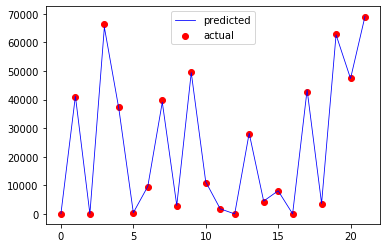

In [38]:
# actual vs predicted for South Korea
x_ax = range(len(y_test_kor))
plt.scatter(x_ax, y_test_kor, color="red", label="actual")
plt.plot(x_ax, y_pred_kor_minmax, lw=0.8, color="blue", label="predicted")
plt.legend()
plt.show()

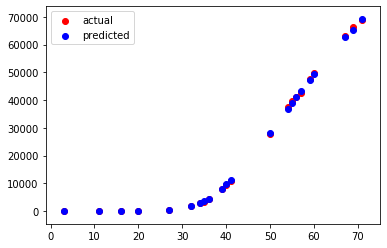

In [39]:
plt.figure()
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_test_kor, color = "red", label="actual")
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_pred_kor_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# Splitting Test Train for USA

In [40]:
X_usa = dfusa.drop(labels=X_col_dropped, axis=1)

X_col_names2 = X_usa.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [41]:
y_usa = dfusa.loc[:,'deaths']

In [42]:
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, test_size=0.3, random_state=1)
print(len(X_train_usa),len(y_train_usa))
print(len(X_test_usa),len(y_test_usa))

63 63
27 27


# SVR for USA with minmax scaling

In [43]:
min_max_scaler = MinMaxScaler()
X_train_usa_minmax = min_max_scaler.fit_transform(X_train_usa)# fit training set
X_test_usa_minmax = min_max_scaler.transform(X_test_usa)# test set transform only, no fit
X_test_usa_minmax

array([[9.39894258e-01, 6.59090909e-01, 7.17363136e-01],
       [9.92023003e-01, 8.86363636e-01, 9.29867185e-01],
       [8.00389574e-01, 4.88636364e-01, 4.98785228e-01],
       [9.14942955e-01, 6.25000000e-01, 6.64480078e-01],
       [9.99721733e-01, 9.88636364e-01, 9.95302883e-01],
       [9.87941749e-01, 8.40909091e-01, 8.87998056e-01],
       [9.51766997e-01, 6.81818182e-01, 7.35989634e-01],
       [8.86745200e-01, 5.90909091e-01, 6.21234208e-01],
       [8.29051108e-01, 5.22727273e-01, 5.32555879e-01],
       [7.61803172e-01, 4.43181818e-01, 4.32215743e-01],
       [7.69594657e-01, 4.54545455e-01, 4.51490120e-01],
       [6.76282349e-01, 3.52272727e-01, 2.96404276e-01],
       [9.80243020e-01, 7.84090909e-01, 8.42970522e-01],
       [5.19246823e-01, 3.06818182e-01, 2.14528669e-01],
       [7.54939245e-01, 4.31818182e-01, 4.22254616e-01],
       [9.77738614e-01, 7.72727273e-01, 8.31794623e-01],
       [5.56534644e-04, 1.13636364e-01, 1.10949142e-02],
       [9.27557740e-05, 2.27272

In [44]:
start_time = time.time()
param_grid = {'C': [10,400,500,600,750,], 'gamma': [30,20,10,2,1.75,1],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train_usa_minmax,y_train_usa)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

# Results: 
#SVR(C=750, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
#    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#time taken for grid search =  448.8078908920288

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=10, gamma=30, kernel=poly, total=   1.2s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.3s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   2.9s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   1.6s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.8s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] ................... C=10, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] ................... C=10, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] .

[CV] ...................... C=400, gamma=30, kernel=rbf, total=   0.0s
[CV] C=400, gamma=30, kernel=rbf .....................................
[CV] ...................... C=400, gamma=30, kernel=rbf, total=   0.0s
[CV] C=400, gamma=30, kernel=rbf .....................................
[CV] ...................... C=400, gamma=30, kernel=rbf, total=   0.0s
[CV] C=400, gamma=30, kernel=rbf .....................................
[CV] ...................... C=400, gamma=30, kernel=rbf, total=   0.0s
[CV] C=400, gamma=30, kernel=poly ....................................
[CV] ..................... C=400, gamma=30, kernel=poly, total=  11.8s
[CV] C=400, gamma=30, kernel=poly ....................................
[CV] ..................... C=400, gamma=30, kernel=poly, total=  49.4s
[CV] C=400, gamma=30, kernel=poly ....................................
[CV] ..................... C=400, gamma=30, kernel=poly, total=   8.1s
[CV] C=400, gamma=30, kernel=poly ....................................
[CV] .

[CV] ................... C=400, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=400, gamma=1.75, kernel=poly ..................................
[CV] ................... C=400, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=400, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=400, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=400, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=400, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=400, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=400, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=400, gamma=1.75, kernel=linear ................................
[CV] .

[CV] ..................... C=500, gamma=20, kernel=poly, total=   6.7s
[CV] C=500, gamma=20, kernel=poly ....................................
[CV] ..................... C=500, gamma=20, kernel=poly, total=   3.6s
[CV] C=500, gamma=20, kernel=poly ....................................
[CV] ..................... C=500, gamma=20, kernel=poly, total=   4.1s
[CV] C=500, gamma=20, kernel=poly ....................................
[CV] ..................... C=500, gamma=20, kernel=poly, total=   3.9s
[CV] C=500, gamma=20, kernel=sigmoid .................................
[CV] .................. C=500, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=20, kernel=sigmoid .................................
[CV] .................. C=500, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=20, kernel=sigmoid .................................
[CV] .................. C=500, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=20, kernel=sigmoid .................................
[CV] .

[CV] ................... C=500, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=500, gamma=1.75, kernel=poly ..................................
[CV] ................... C=500, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=500, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=500, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=500, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=500, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=500, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=500, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=500, gamma=1.75, kernel=linear ................................
[CV] .

[CV] ..................... C=600, gamma=20, kernel=poly, total=   2.9s
[CV] C=600, gamma=20, kernel=poly ....................................
[CV] ..................... C=600, gamma=20, kernel=poly, total=   6.9s
[CV] C=600, gamma=20, kernel=poly ....................................
[CV] ..................... C=600, gamma=20, kernel=poly, total=   4.5s
[CV] C=600, gamma=20, kernel=poly ....................................
[CV] ..................... C=600, gamma=20, kernel=poly, total=   3.7s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .................. C=600, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=20, kernel=sigmoid .................................
[CV] .

[CV] ................... C=600, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=600, gamma=1.75, kernel=poly ..................................
[CV] ................... C=600, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=600, gamma=1.75, kernel=poly ..................................
[CV] ................... C=600, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=600, gamma=1.75, kernel=poly ..................................
[CV] ................... C=600, gamma=1.75, kernel=poly, total=   0.0s
[CV] C=600, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=600, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=600, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=1.75, kernel=sigmoid ...............................
[CV] ................ C=600, gamma=1.75, kernel=sigmoid, total=   0.0s
[CV] C=600, gamma=1.75, kernel=sigmoid ...............................
[CV] .

[CV] ..................... C=750, gamma=20, kernel=poly, total=   7.0s
[CV] C=750, gamma=20, kernel=poly ....................................
[CV] ..................... C=750, gamma=20, kernel=poly, total=  10.4s
[CV] C=750, gamma=20, kernel=poly ....................................
[CV] ..................... C=750, gamma=20, kernel=poly, total=   5.8s
[CV] C=750, gamma=20, kernel=poly ....................................
[CV] ..................... C=750, gamma=20, kernel=poly, total=  12.0s
[CV] C=750, gamma=20, kernel=poly ....................................
[CV] ..................... C=750, gamma=20, kernel=poly, total=   6.0s
[CV] C=750, gamma=20, kernel=sigmoid .................................
[CV] .................. C=750, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=20, kernel=sigmoid .................................
[CV] .................. C=750, gamma=20, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=20, kernel=sigmoid .................................
[CV] .

[CV] ...................... C=750, gamma=1, kernel=poly, total=   0.0s
[CV] C=750, gamma=1, kernel=poly .....................................
[CV] ...................... C=750, gamma=1, kernel=poly, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=750, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=750, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.5min finished


In [45]:
y_pred_usa_minmax = grid.best_estimator_.predict(X_test_usa_minmax)
y_pred_usa_minmax

array([ 1.79333175e+02,  2.40895870e+02,  9.64946035e+01,  1.64099620e+02,
        2.52501197e+02,  2.35152625e+02,  1.87278116e+02,  1.49409607e+02,
        1.13039753e+02,  7.63756865e+01,  8.08432629e+01,  4.97848867e+01,
        2.24314045e+02,  3.16131921e+01,  7.35069122e+01,  2.21142264e+02,
       -8.80752165e-02, -3.06955431e-02,  2.54959564e+02,  2.26683704e+02,
        1.52639840e+02,  9.39247518e+00,  2.48436944e+02,  6.71659810e+01,
        5.61725222e+01,  5.27120530e+01,  1.08599786e+02])

In [46]:
mse = mean_squared_error(y_test_usa,y_pred_usa_minmax)
mae = mean_absolute_error(y_test_usa,y_pred_usa_minmax)
print("MSE for USA: %.2f" % mse)
print("MAE for USA: %.2f" % mae)
print("RMSE for USA: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for USA: %.2f" % r2_score)

MSE for USA: 3.34
MAE for USA: 1.37
RMSE for USA: 1.83


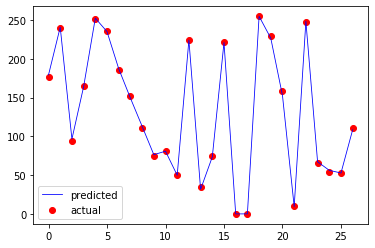

In [47]:
# actual vs predicted for USA
x_ax = range(len(y_test_usa))
plt.scatter(x_ax, y_test_usa, color="red", label="actual")
plt.plot(x_ax, y_pred_usa_minmax, lw=0.8, color="blue", label="predicted")
plt.legend()
plt.show()

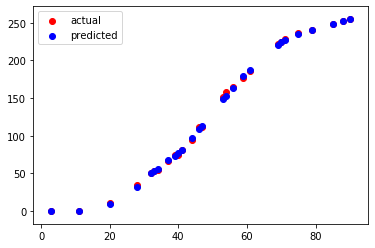

In [48]:
plt.figure()
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_test_usa, color = "red", label="actual")
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_pred_usa_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# XGB Model for Korea using minmax scaling

In [ ]:
learning_rate_range = [0.01, 0.025,0.05, 0.1, 0.15, 0.2]
max_depth_range = [1,2,3,4,5]
subsample_range = [0.25, 0.5,1, 1.5]
n_estimators_range = [400, 600,800,1000, 1200]

param_grid = dict(learning_rate=learning_rate_range, max_depth=max_depth_range,
                  subsample=subsample_range, n_estimators=n_estimators_range)
param_grid

In [ ]:
start_time = time.time()
grid = GridSearchCV(XGBRegressor(n_jobs=-1), 
                    param_grid=param_grid, 
                    n_jobs=-1)
grid.fit(X_train_kor_minmax, y_train_kor)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

In [ ]:
y_pred_kor_minmax = grid.best_estimator_.predict(X_test_kor_minmax)
y_pred_kor_minmax

In [ ]:
mse = mean_squared_error(y_test_kor,y_pred_kor_minmax)
mae = mean_absolute_error(y_test_kor,y_pred_kor_minmax)
# r2_score = r2_score(y_test_kor,y_pred_kor_minmax)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for South Korea: %.2f" % r2_score)

In [ ]:
# actual vs predicted for South Korea
x_ax = range(len(y_test_kor))
plt.scatter(x_ax, y_test_kor, color="red", label="actual")
plt.plot(x_ax, y_pred_kor_minmax, lw=0.8, color="blue", label="predicted")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_test_kor, color = "red", label="actual")
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_pred_kor_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# XGB Model for USA

In [ ]:
learning_rate_range = [0.01, 0.025,0.05, 0.1, 0.15, 0.2]
max_depth_range = [1,2,3,4,5]
subsample_range = [0.25, 0.5,1, 1.5]
n_estimators_range = [400, 600,800,1000, 1200]

param_grid = dict(learning_rate=learning_rate_range, max_depth=max_depth_range,
                  subsample=subsample_range, n_estimators=n_estimators_range)
param_grid

In [ ]:
start_time = time.time()
grid = GridSearchCV(XGBRegressor(n_jobs=-1), 
                    param_grid=param_grid, 
                    n_jobs=-1)
grid.fit(X_train_usa_minmax, y_train_usa)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

In [ ]:
y_pred_usa_minmax = grid.best_estimator_.predict(X_test_usa_minmax)
y_pred_usa_minmax

In [ ]:
mse = mean_squared_error(y_test_usa,y_pred_usa_minmax)
mae = mean_absolute_error(y_test_usa,y_pred_usa_minmax)
print("MSE for USA: %.2f" % mse)
print("MAE for USA: %.2f" % mae)
print("RMSE for USA: %.2f" % np.sqrt(mse))


In [ ]:
plt.figure()
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_test_usa, color = "red", label="actual")
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_pred_usa_minmax, color = "grey", label="predicted")
plt.legend()
plt.show()

# Logistic Model for Korea

# Logistic Model for USA

# Conclusions

In [ ]:
# Which model is better comparing mae and mse 
# Show values for each model 
# Put best model for each country with actual predicted graph
